<a href="https://colab.research.google.com/github/NAHELALFATH/Dataset-Analysing/blob/master/Spam_Classifier_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [0]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
dataA = open("spam.csv")
dataA_df = pd.read_csv(dataA,header=0)
dataA_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [0]:
from google.colab import files
uploaded2 = files.upload()

KeyboardInterrupt: ignored

In [0]:
trainingSet, testSet = train_test_split(dataA_df, test_size=0.2, stratify=dataA_df['CLASS'], random_state=0)

In [0]:
stopw  = set([w for w in open("stopword_indo.txt","r")])
print("jumlah stopwords : ",len(stopw))

jumlah stopwords :  757


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer="word", ngram_range=(1,1), stop_words=stopw, lowercase=True)

train_vect = count_vect.fit_transform(trainingSet['CONTENT'].astype(str)) #fit transform pada data train A
test_vect = count_vect.transform(testSet['CONTENT'].astype(str)) #transform data test

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'baiknya', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'ber

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [0]:
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=200, base_estimator=svc,learning_rate=0.1)
# Train Adaboost Classifer
model = abc.fit(train_vect,trainingSet['CLASS'])
Predict = model.predict(test_vect)

In [0]:
print("Accuracy test : ", accuracy_score(Predict, testSet['CLASS']))
print("Precision Baseline : ", precision_score(Predict, testSet['CLASS']))
print("Recall baseline pada data set: ", recall_score(Predict, testSet['CLASS']))
print ("F1 baseline pada test data:", f1_score(Predict, testSet['CLASS']))

Accuracy test :  0.95
Precision Baseline :  0.9
Recall baseline pada data set:  1.0
F1 baseline pada test data: 0.9473684210526316


In [0]:
tn_dev, fp_dev, fn_dev, tp_dev = confusion_matrix(Predict, testSet['CLASS']).ravel()
TPR_dev = tp_dev/(tp_dev+fn_dev)
FPR_dev = fp_dev/(fp_dev+tn_dev)
print("TPR baseline:", TPR_dev, "dan FPR baseline:", FPR_dev)

TPR baseline: 1.0 dan FPR baseline: 0.09090909090909091


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[70  0]
 [ 7 63]]
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


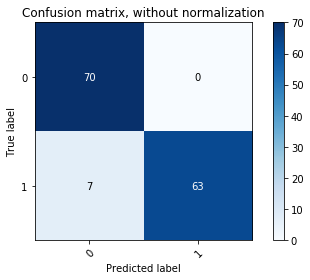

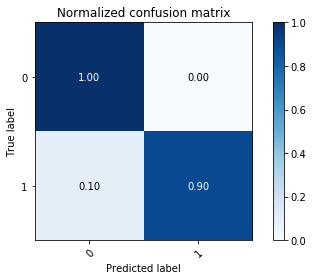

In [0]:
plot_confusion_matrix(testSet['CLASS'], Predict, classes = np.array([0,1]),title='Confusion matrix, without normalization')
plot_confusion_matrix(testSet['CLASS'], Predict, classes = np.array([0,1]), normalize=True,title='Normalized confusion matrix')
plt.show()